# Kaggle Titanic Competition EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
try:
    for dirname, _, filenames in os.walk('../kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
except:
    for dirname, _, filenames in os.walk('../kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../kaggle/input/titanic/gender_submission.csv
../kaggle/input/titanic/test.csv
../kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv("../kaggle/input/titanic/train.csv")
test_data = pd.read_csv("../kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("../kaggle/input/titanic/gender_submission.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# Test how sex played into survivability -- taken from the tutorial
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(f"{rate_women:.1%}% of women in the training set survived:")

print(f"{rate_men:.1%}% of men in the training set survived:")


74.2%% of women in the training set survived:
18.9%% of men in the training set survived:


## Observations
* There are 891 records in the training data set, 418 in the testing set
* 177 are missing the age in the training set, 86 missing in the testing set
* The age column has an outlier at 80 years in the training set, and 76 years in the testing set
* For many passengers the age is unknown, as well as cabin, and a few the embarkation point


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data_ages = train_data[~(train_data["Age"].isin([np.nan]))]
train_data_noages = train_data[train_data["Age"].isin([np.nan])]
train_data["Age"].fillna(value= -10, inplace=True)
train_data["Embarked"].fillna(value="U", inplace=True)
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,4
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,21.812761,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,20.499295,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,-10.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train_data_noages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [10]:
train_data_ages.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [11]:
train_data_noages.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


<AxesSubplot:title={'center':'The Whole Shebang'}>

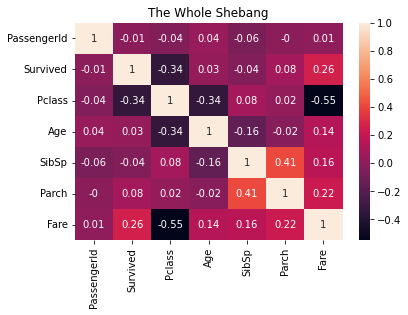

In [12]:
# plot a correlation matrix to get a clue
corr_m = train_data.corr(numeric_only=True).round(2)
fig, ax = plt.subplots()
plt.title("The Whole Shebang")
sns.heatmap(corr_m, annot=True)

<AxesSubplot:title={'center':'Known Ages'}>

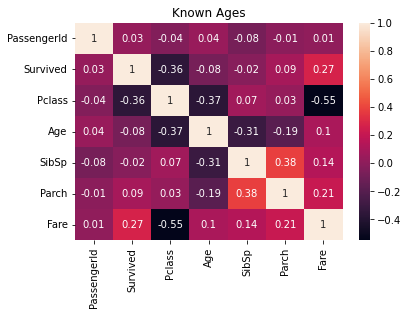

In [13]:
# plot a correlation matrix to get a clue
corr_m = train_data_ages.corr(numeric_only=True).round(2)
plt.title("Known Ages")
sns.heatmap(corr_m, annot=True)

<AxesSubplot:title={'center':'Unknown Ages'}>

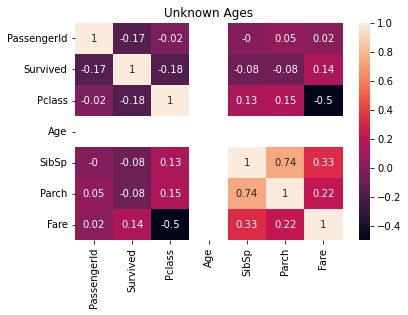

In [14]:
# plot a correlation matrix to get a clue
corr_m = train_data_noages.corr(numeric_only=True).round(2)
plt.title("Unknown Ages")
sns.heatmap(corr_m, annot=True)

Explore some features using boxplots with the data that has known ages

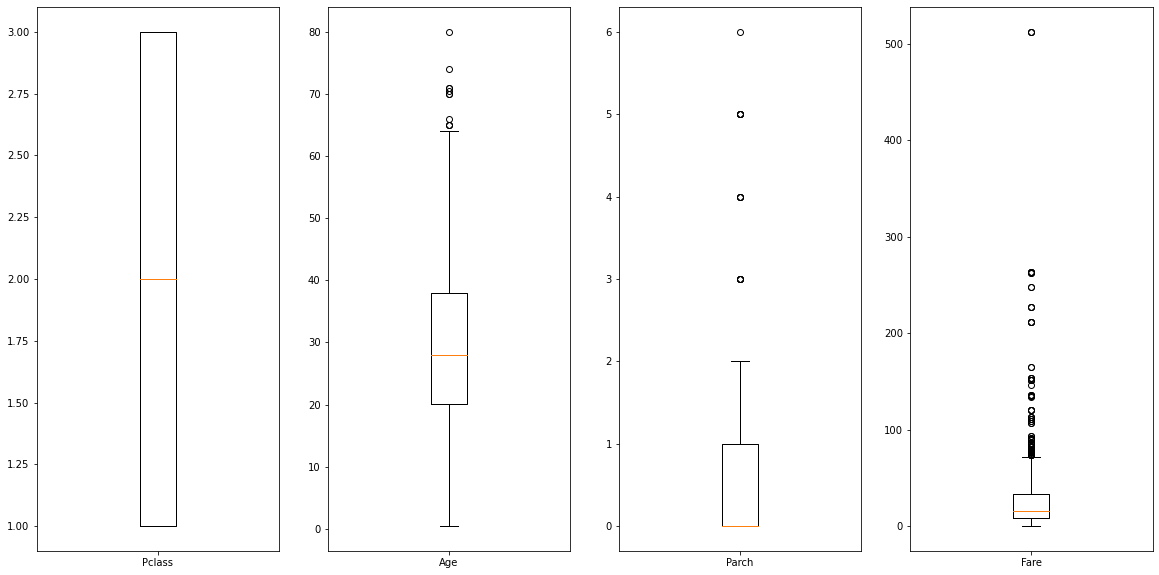

In [15]:
box_list = ["Pclass","Age","Parch","Fare"]
fig, ax = plt.subplots(1,len(box_list),figsize=(20,10))

for label_pos in range(len(box_list)):
    ax[label_pos].boxplot(train_data_ages[box_list[label_pos]],labels=[box_list[label_pos]])
plt.show()

### Survival rates in various groupings

#### By Sex

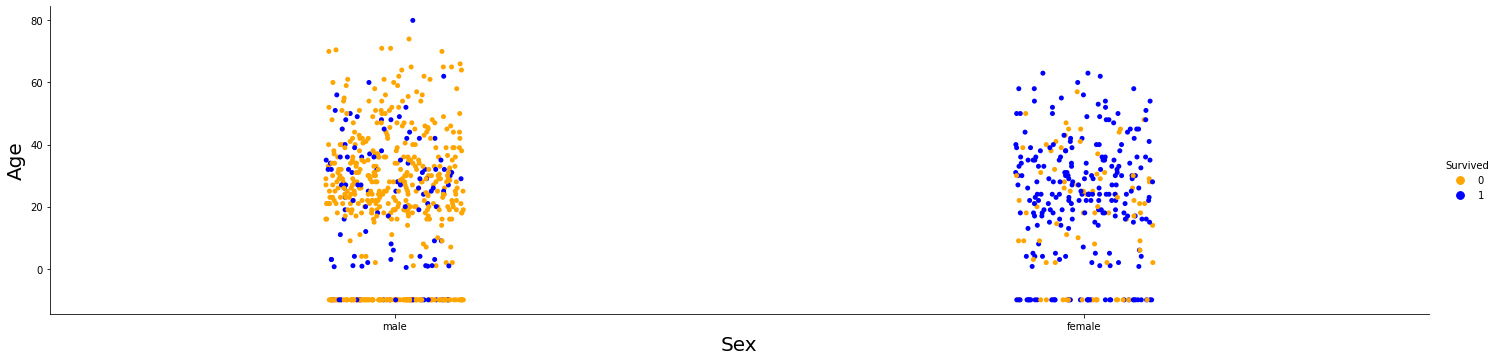

In [16]:
# plot Age v Sex
sns.catplot(data=train_data,x="Sex", y="Age", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Survival by Sex'}, ylabel='Percentage'>

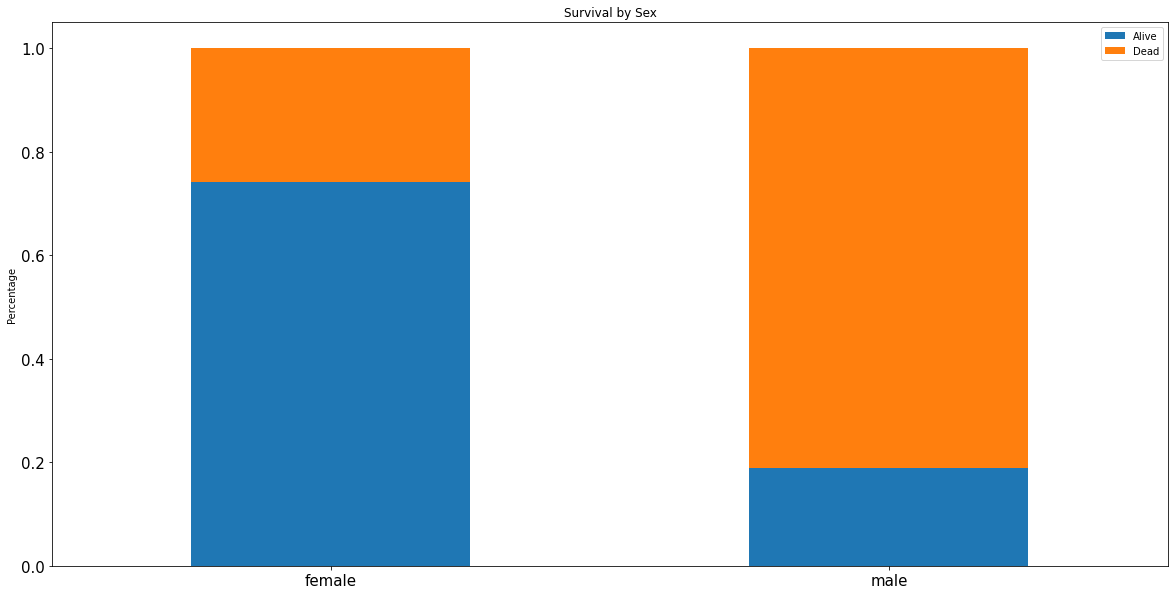

In [17]:
alive = []
dead = []
index_labels = list(train_data["Sex"].fillna(value="Unknown").unique())
index_labels.sort()
temp_df = train_data[["Sex", "Survived"]].fillna(value= -1)
for pclass in index_labels:
    pct = temp_df[temp_df["Sex"] == pclass].value_counts(normalize=True, sort=False, subset=["Sex","Survived"])
    try:
        alive.append(pct[pclass][1])
    except:
        alive.append(0.0)
    try:
        dead.append(pct[pclass][0])
    except:
        dead.append(0.0)

sibsp_df = pd.DataFrame({
    "Alive": alive,
    "Dead": dead
    },
    index=index_labels
    )
sibsp_df.plot(kind="bar", stacked=True, figsize=(20,10), title="Survival by Sex", ylabel="Percentage", fontsize=15, rot=0)  

#### By Passenger Class

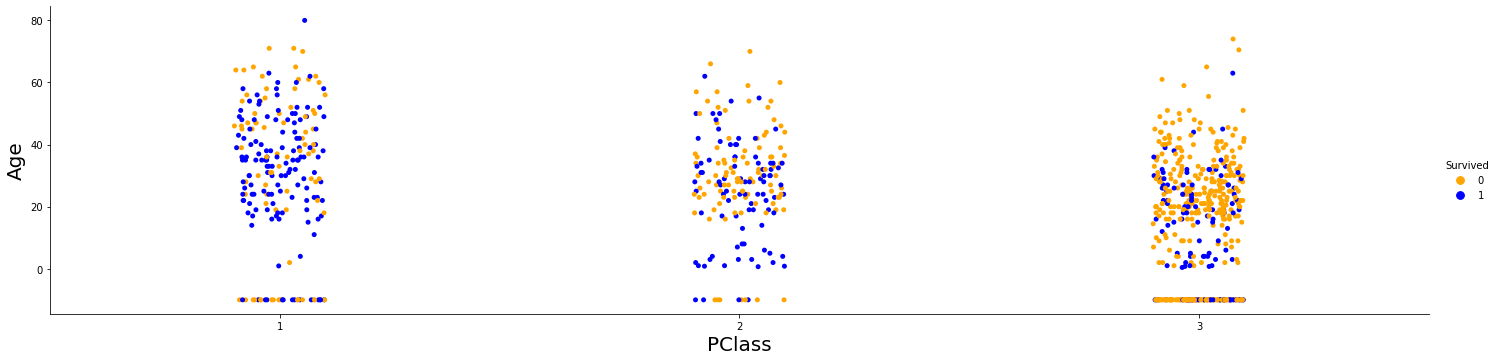

In [18]:
# plot Age v PClass
sns.catplot(data=train_data,x="Pclass", y="Age", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("PClass",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Survival by Passenger Class'}, ylabel='Percentage'>

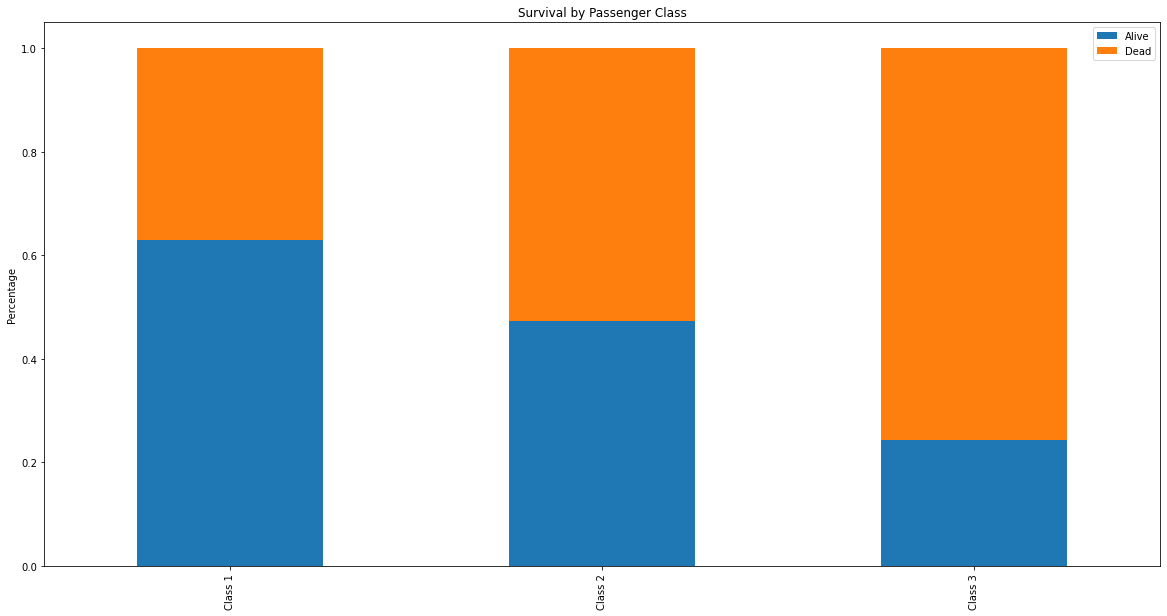

In [19]:
alive = []
dead = []
for pclass in (1,2,3):
    pct = train_data[train_data["Pclass"] == pclass].value_counts(normalize=True, sort=False, subset=["Pclass","Survived"])
    alive.append(pct[pclass][1])
    dead.append(pct[pclass][0])
pclass_df = pd.DataFrame({
    "Alive": alive,
    "Dead": dead
},
    index=["Class 1", "Class 2", "Class 3"]
           )
pclass_df.plot(kind="bar", stacked=True, figsize=(20,10), title="Survival by Passenger Class", ylabel="Percentage")  

The survival rate decreases as passenger class increases.

#### By Parent/Child relationships

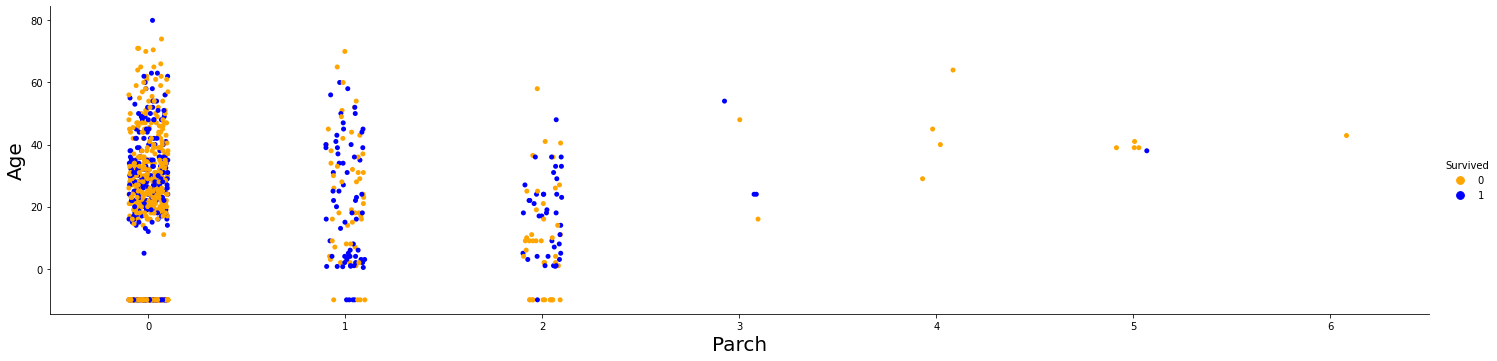

In [20]:
# plot Age v Parch
sns.catplot(data=train_data,x="Parch", y="Age", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("Parch",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Survival by Parent Child Relations'}, ylabel='Percentage'>

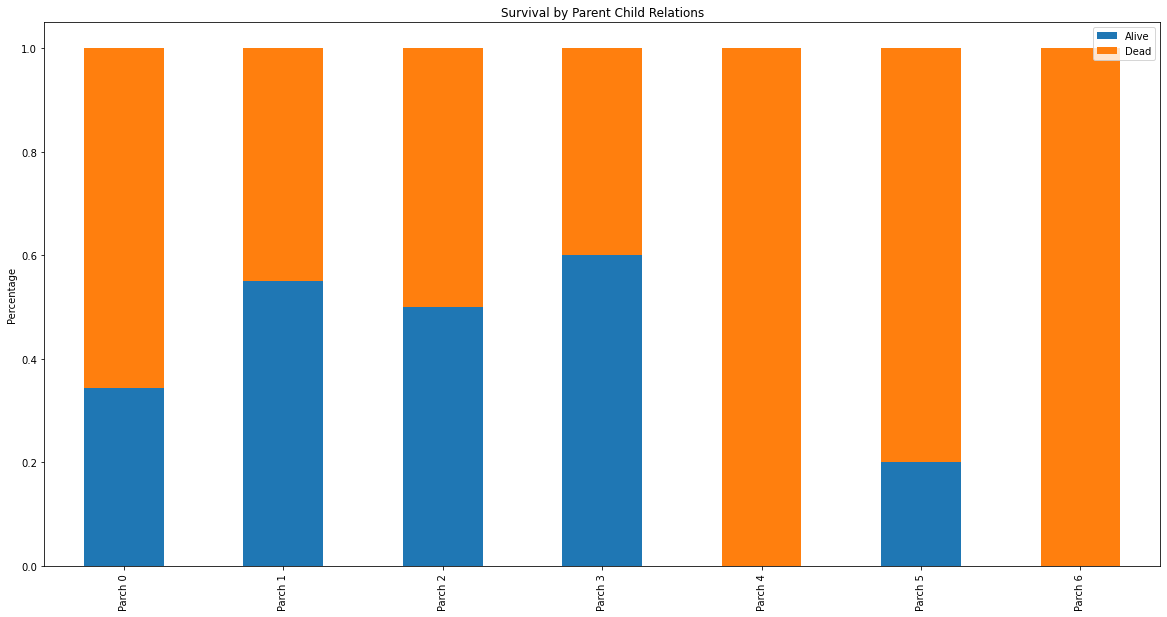

In [21]:
alive = []
dead = []
index_labels = []
for pclass in range(0,(train_data.Parch.max() +1)):
    pct = train_data[train_data["Parch"] == pclass].value_counts(normalize=True, sort=False, subset=["Parch","Survived"])
    try:
        alive.append(pct[pclass][1])
    except:
        alive.append(0.0)
    try:
        dead.append(pct[pclass][0])
    except:
        dead.append(0.0)
    index_labels.append("Parch " + str(pclass))

    parch_df = pd.DataFrame({
    "Alive": alive,
    "Dead": dead
},
    index=index_labels
           )
parch_df.plot(kind="bar", stacked=True, figsize=(20,10), title="Survival by Parent Child Relations", ylabel="Percentage")  

#### By Embarkation Point

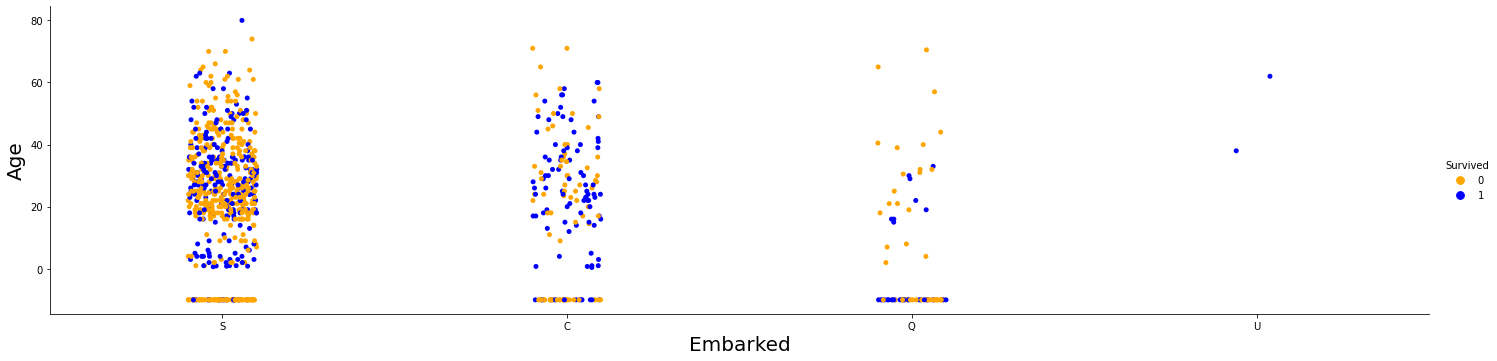

In [22]:
# plot Age v Embarked
sns.catplot(data=train_data,x="Embarked", y="Age", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("Embarked",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Survival by Embarkation Point (U = Embarkation Unknown)'}, ylabel='Percentage'>

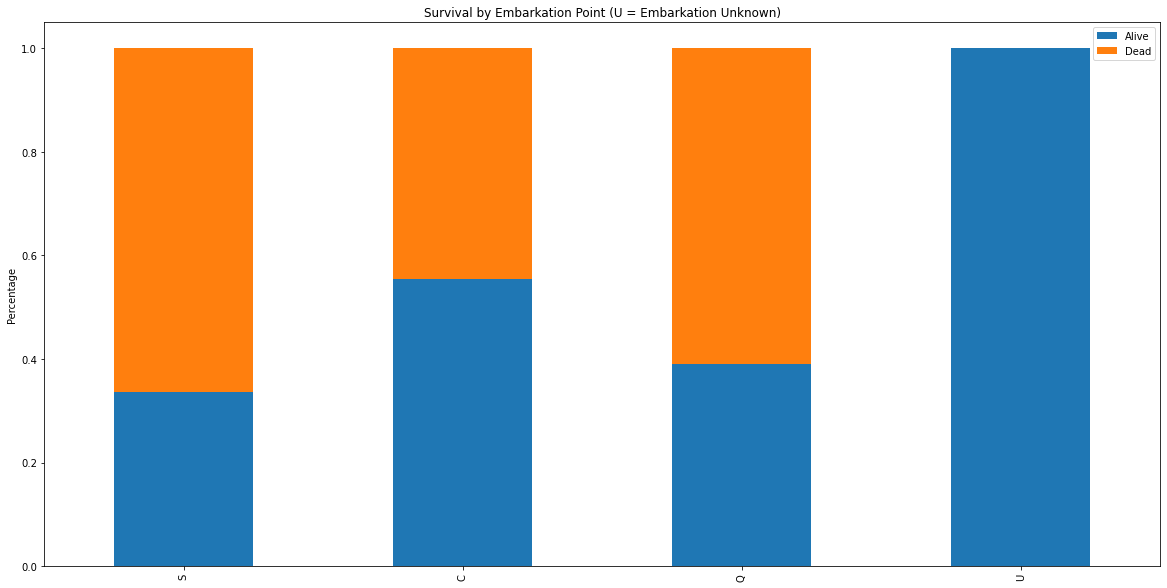

In [23]:
alive = []
dead = []
index_labels = list(train_data["Embarked"].fillna(value="U").unique())
temp_df = train_data[["Embarked", "Survived"]].fillna(value="U")
for pclass in index_labels:
    pct = temp_df[temp_df["Embarked"] == pclass].value_counts(normalize=True, sort=False, subset=["Embarked","Survived"])
    try:
        alive.append(pct[pclass][1])
    except:
        alive.append(0.0)
    try:
        dead.append(pct[pclass][0])
    except:
        dead.append(0.0)

emb_df = pd.DataFrame({
    "Alive": alive,
    "Dead": dead
    },
    index=index_labels
    )
emb_df.plot(kind="bar", stacked=True, figsize=(20,10), title="Survival by Embarkation Point (U = Embarkation Unknown)", ylabel="Percentage")  

#### By Quantity Siblings/Spouses with Traveler 

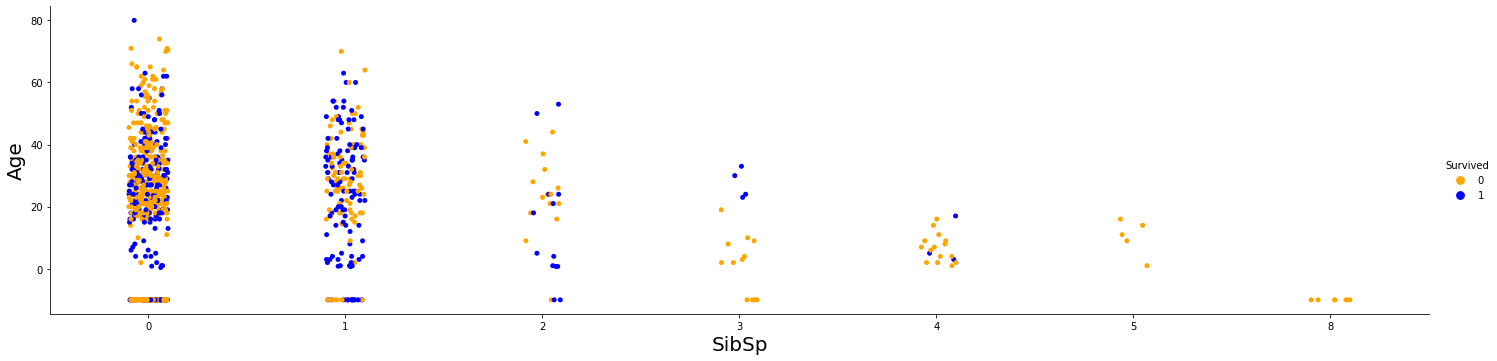

In [24]:
# plot Age v SibSp
sns.catplot(data=train_data,x="SibSp", y="Age", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("SibSp",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Survival by Spouse/Number of Siblings accompanying the traveler'}, ylabel='Percentage'>

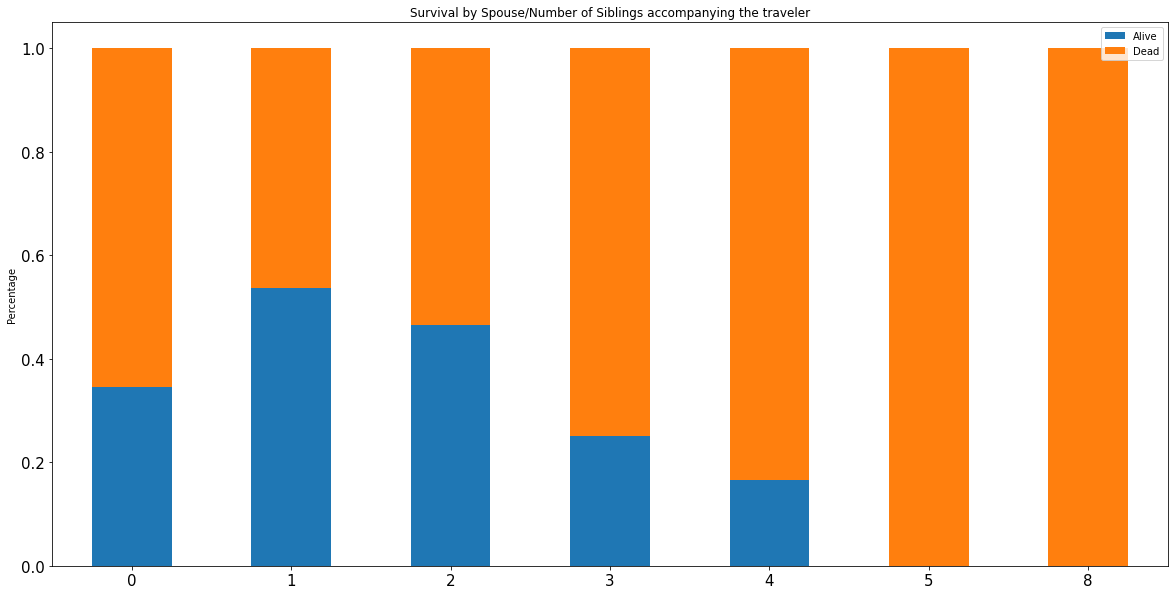

In [25]:
alive = []
dead = []
index_labels = list(train_data["SibSp"].fillna(value=0).unique())
index_labels.sort()
temp_df = train_data[["SibSp", "Survived"]].fillna(value=0)
for pclass in index_labels:
    pct = temp_df[temp_df["SibSp"] == pclass].value_counts(normalize=True, sort=False, subset=["SibSp","Survived"])
    try:
        alive.append(pct[pclass][1])
    except:
        alive.append(0.0)
    try:
        dead.append(pct[pclass][0])
    except:
        dead.append(0.0)

sibsp_df = pd.DataFrame({
    "Alive": alive,
    "Dead": dead
    },
    index=index_labels
    )
sibsp_df.plot(kind="bar", stacked=True, figsize=(20,10), title="Survival by Spouse/Number of Siblings accompanying the traveler", ylabel="Percentage", fontsize=15, rot=0)  

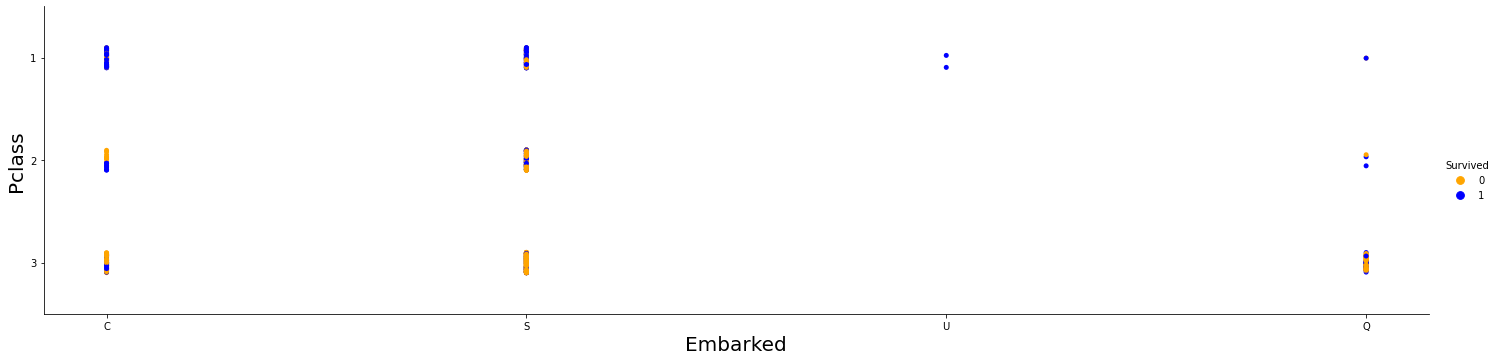

In [26]:
# plot Embarked v PClass
sns.catplot(data=train_data,x="Embarked", y="Pclass", hue="Survived", aspect = 4,palette=['orange','blue'], orient='h')
plt.xlabel("Embarked",fontsize=20)
plt.ylabel("Pclass",fontsize=20)
plt.show()

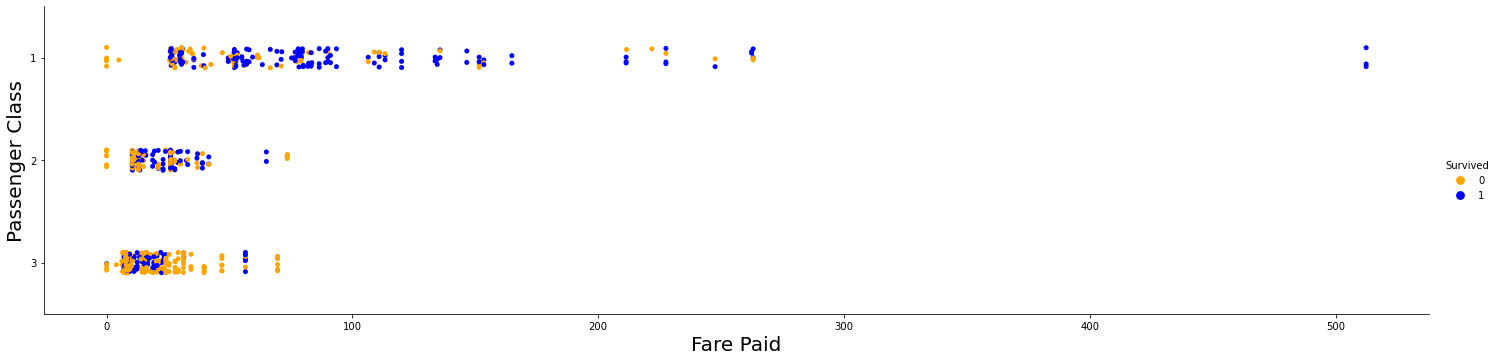

In [27]:
# plot Fare v PClass
sns.catplot(data=train_data,x="Fare", y="Pclass", hue="Survived", aspect = 4,palette=['orange','blue'], orient='h')
plt.xlabel("Fare Paid",fontsize=20)
plt.ylabel("Passenger Class",fontsize=20)
plt.show()

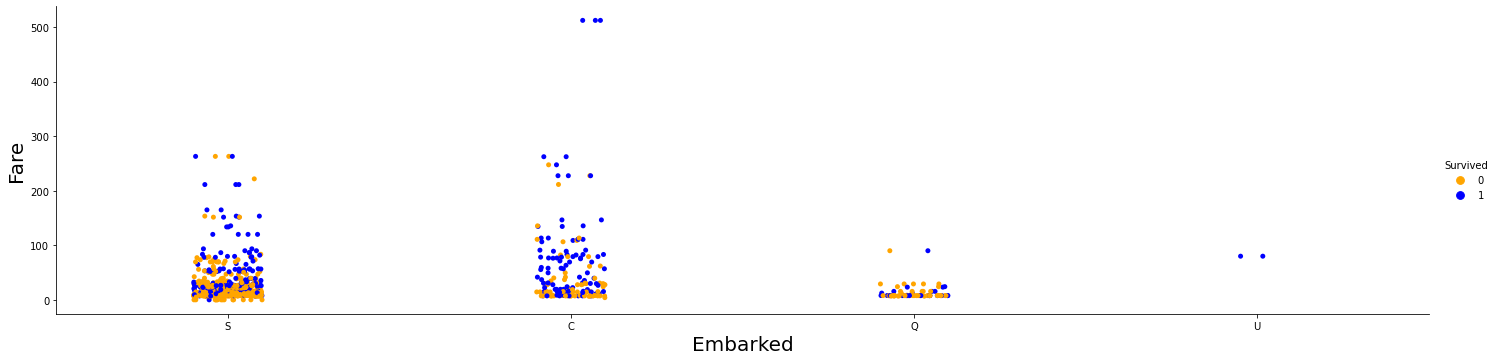

In [28]:
# plot Age v PClass
sns.catplot(data=train_data,x="Embarked", y="Fare", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("Embarked",fontsize=20)
plt.ylabel("Fare",fontsize=20)
plt.show()

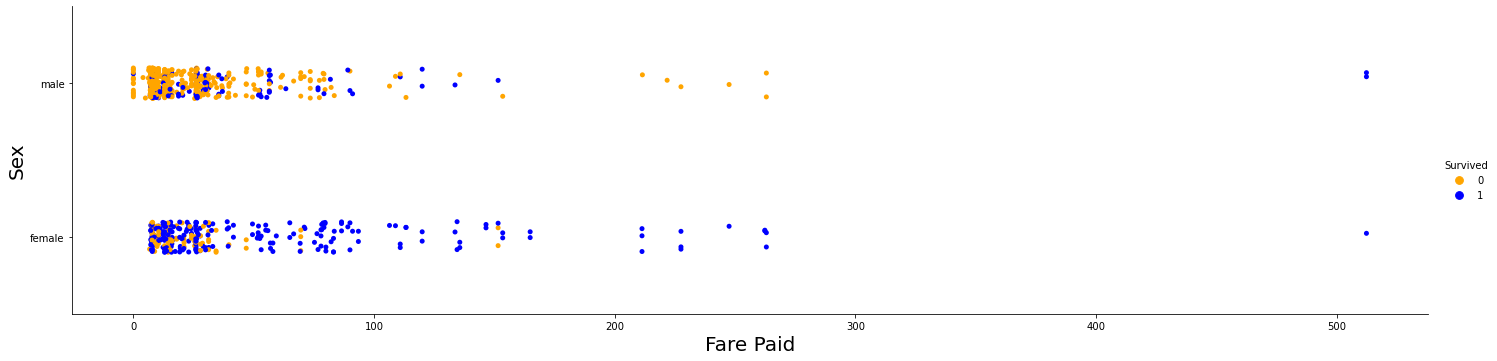

In [29]:
# plot Sex v Fare
sns.catplot(data=train_data,x="Fare", y="Sex", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("Fare Paid",fontsize=20)
plt.ylabel("Sex",fontsize=20)
plt.show()

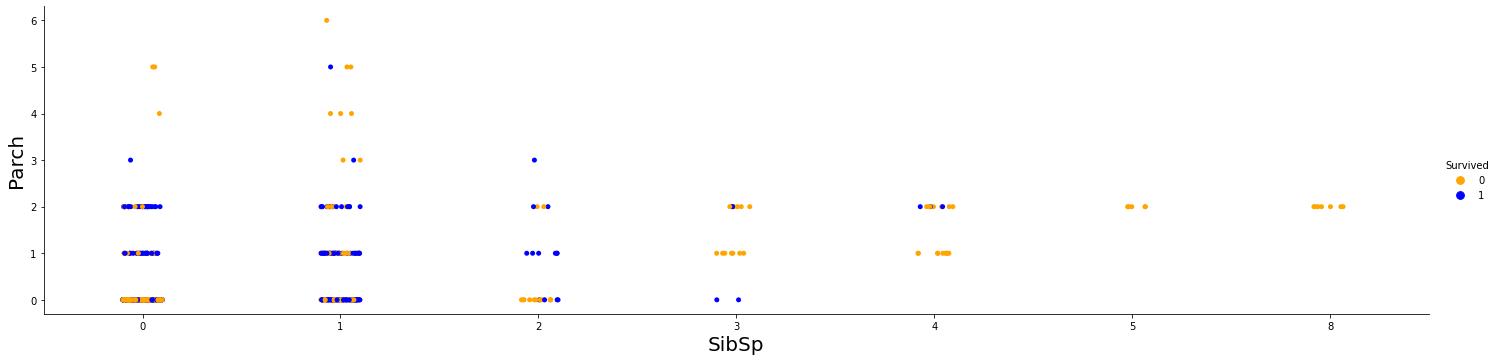

In [30]:
# plot SibSp v Parch
sns.catplot(data=train_data,x="SibSp", y="Parch", hue="Survived", aspect = 4,palette=['orange','blue'])
plt.xlabel("SibSp",fontsize=20)
plt.ylabel("Parch",fontsize=20)
plt.show()

This is interesting. Some combinations of Parch and SibSp show increased purity in the data.

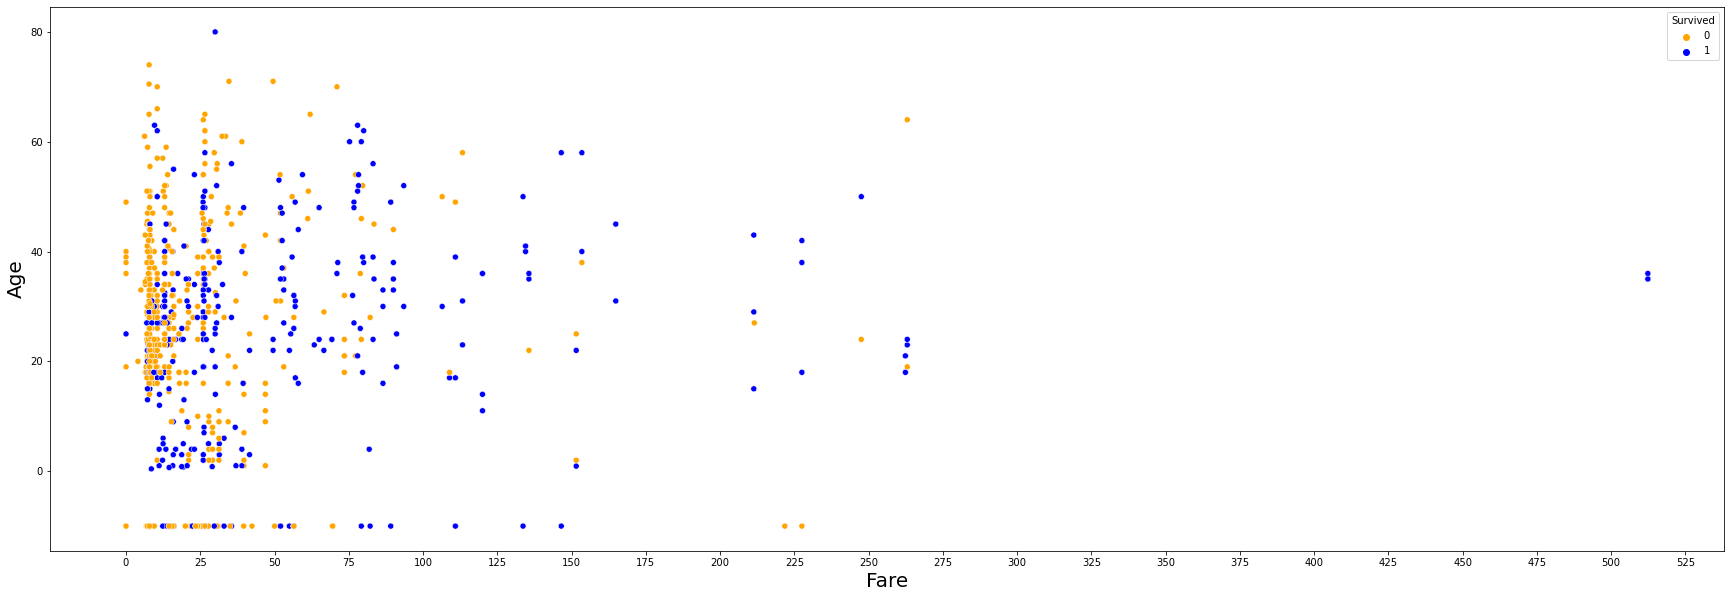

In [31]:
# plot Age v Fare
fare_labels = np.arange(0,(train_data_ages.Fare.max()+25),step=25,dtype=np.int16)
plt.subplots(figsize=(30,10))
# plt.scatter(train_data_ages["Fare"], train_data_ages["Age"], c=train_data_ages["Survived"],cmap=["orange", "blue"])
sns.scatterplot(data=train_data,x="Fare", y="Age", hue="Survived",palette=["orange", "blue"])
plt.xlabel("Fare",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.xticks(ticks=fare_labels, labels=fare_labels)

plt.show()

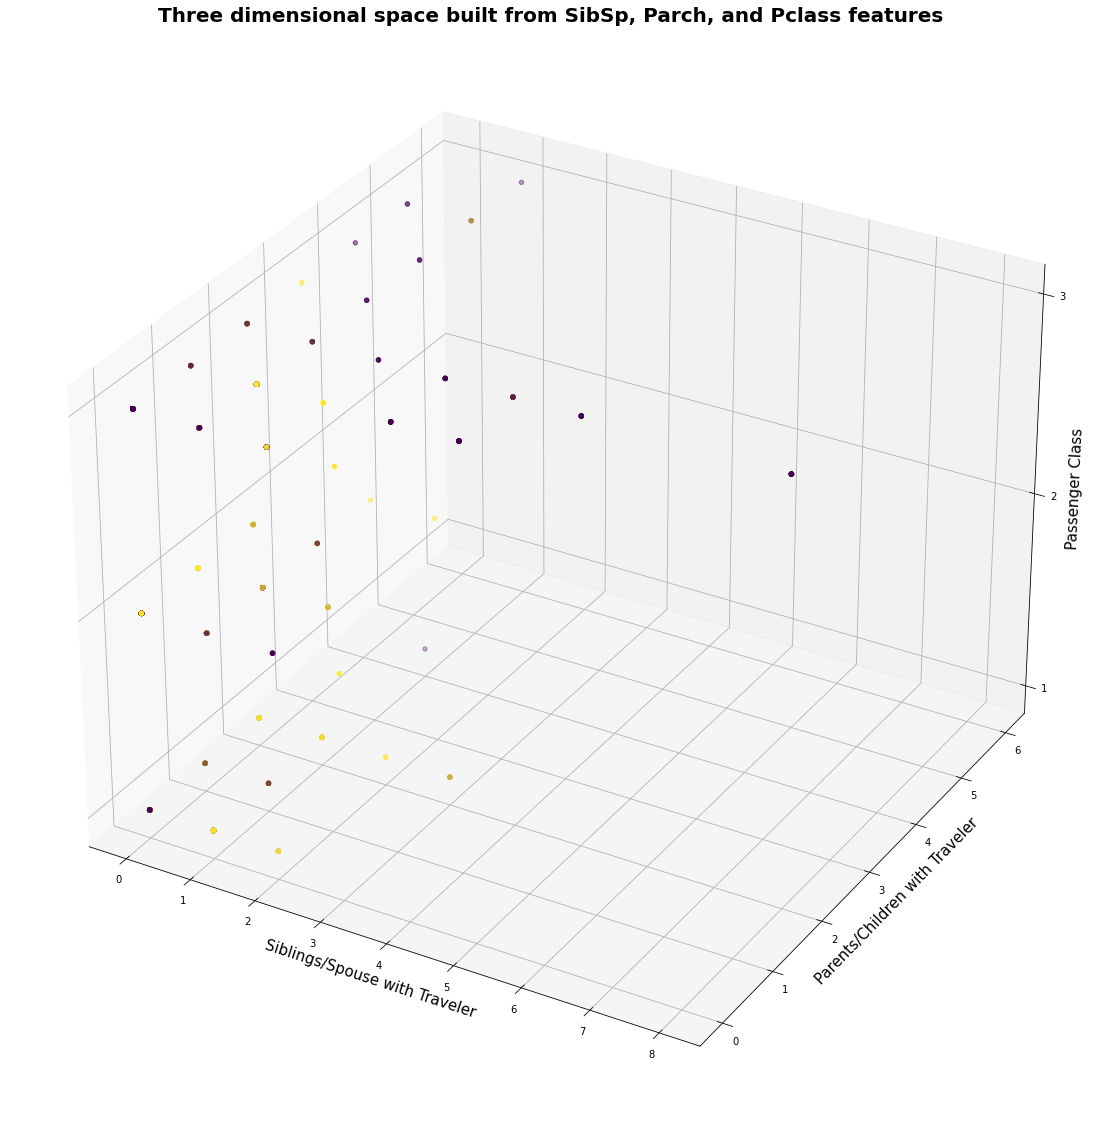

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"}, figsize=(20,20))
ax.scatter(train_data["SibSp"], train_data["Parch"], train_data["Pclass"], c=train_data["Survived"])
ax.set_title("Three dimensional space built from SibSp, Parch, and Pclass features", fontsize=20, fontweight='bold')
ax.set_xlabel("Siblings/Spouse with Traveler", fontsize=15)
ax.set_ylabel("Parents/Children with Traveler",  fontsize=15)
ax.set_zlabel("Passenger Class", fontsize=15)
ax.set_zticks([1,2,3])
#plt.zlabel("Age")
plt.show()

This suggests assigning clusters based on these features may improve prediction accuracy.

# EDA Conclusions
## Observations
Sex seems to be the primary determinant of survival in the Titanic disaster. Other factors such as Passenger Class, whether a spouse or siblings were with the passenger, and parent-child relations have weaker but apparent effect on survivability. Age itself does not track linearly with survivability but there seems to be ranges which may have better chances than others. Parch and SibSp plotted against each other resulted in some groups with increased purity in the Survived category.

## Plan of Attack

* Missing data will be filled in.
* Ages will be binned into Age Groups, with an unknown group for the missing ages.
* Cabin assignment seems to have a section designation as the first character. A section feature will be added in case this proves to be useful.
* Clustering will be used to add a cluster feature based on Parch, SibSp, and Pclass.
* Categorical data will be transformed via one-hot encoding.


